# Predict survival on the Titanic

### Scenario of Interest and Objective

You are a data scientist working for a historical research institution that is keen on understanding the factors that influenced the survival of passengers during the tragic sinking of the RMS Titanic in 1912.
You have to build a predictive model that answers the question: “What sorts of people were more likely to survive?”.

Import needed libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno 
from random import randint
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
from sklearn.model_selection import GridSearchCV

Load the data

In [2]:
#train set
path_train="train.csv" #set the path
train=pd.read_csv(path_train) #read the csv file

#test set
path_test="test.csv"
test=pd.read_csv(path_test)

### Data Exploration and Preprocess

In [3]:
print(train.shape) #show the shape of the dataset
print(test.shape) 

(891, 12)
(418, 12)


In [4]:
train.head() #show the first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df=pd.concat([train,test], ignore_index=True) #concatenate the train and test datasets since we verified they have the same structure

In [7]:
print(df.shape)

(1309, 12)


In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.tail() #show the first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
1308,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
df.sample(5) #show 5 random rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1101,1102,0,3,"Andersen, Mr. Albert Karvin",male,32.0,0,0,C 4001,22.5250,NaN,S
955,956,0,1,"Ryerson, Master. John Borie",male,13.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,B94,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
1043,1044,0,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [11]:
df.info(verbose=True) #show the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


There are 5 categorical variables and 7 numerical variables 

In [12]:
df.describe().T #show the features of numerical columns 
#for a representation of the main statistical parameters of numerical variables

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,1309.0,0.377387,0.484918,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


Missing Values Summary for train: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64



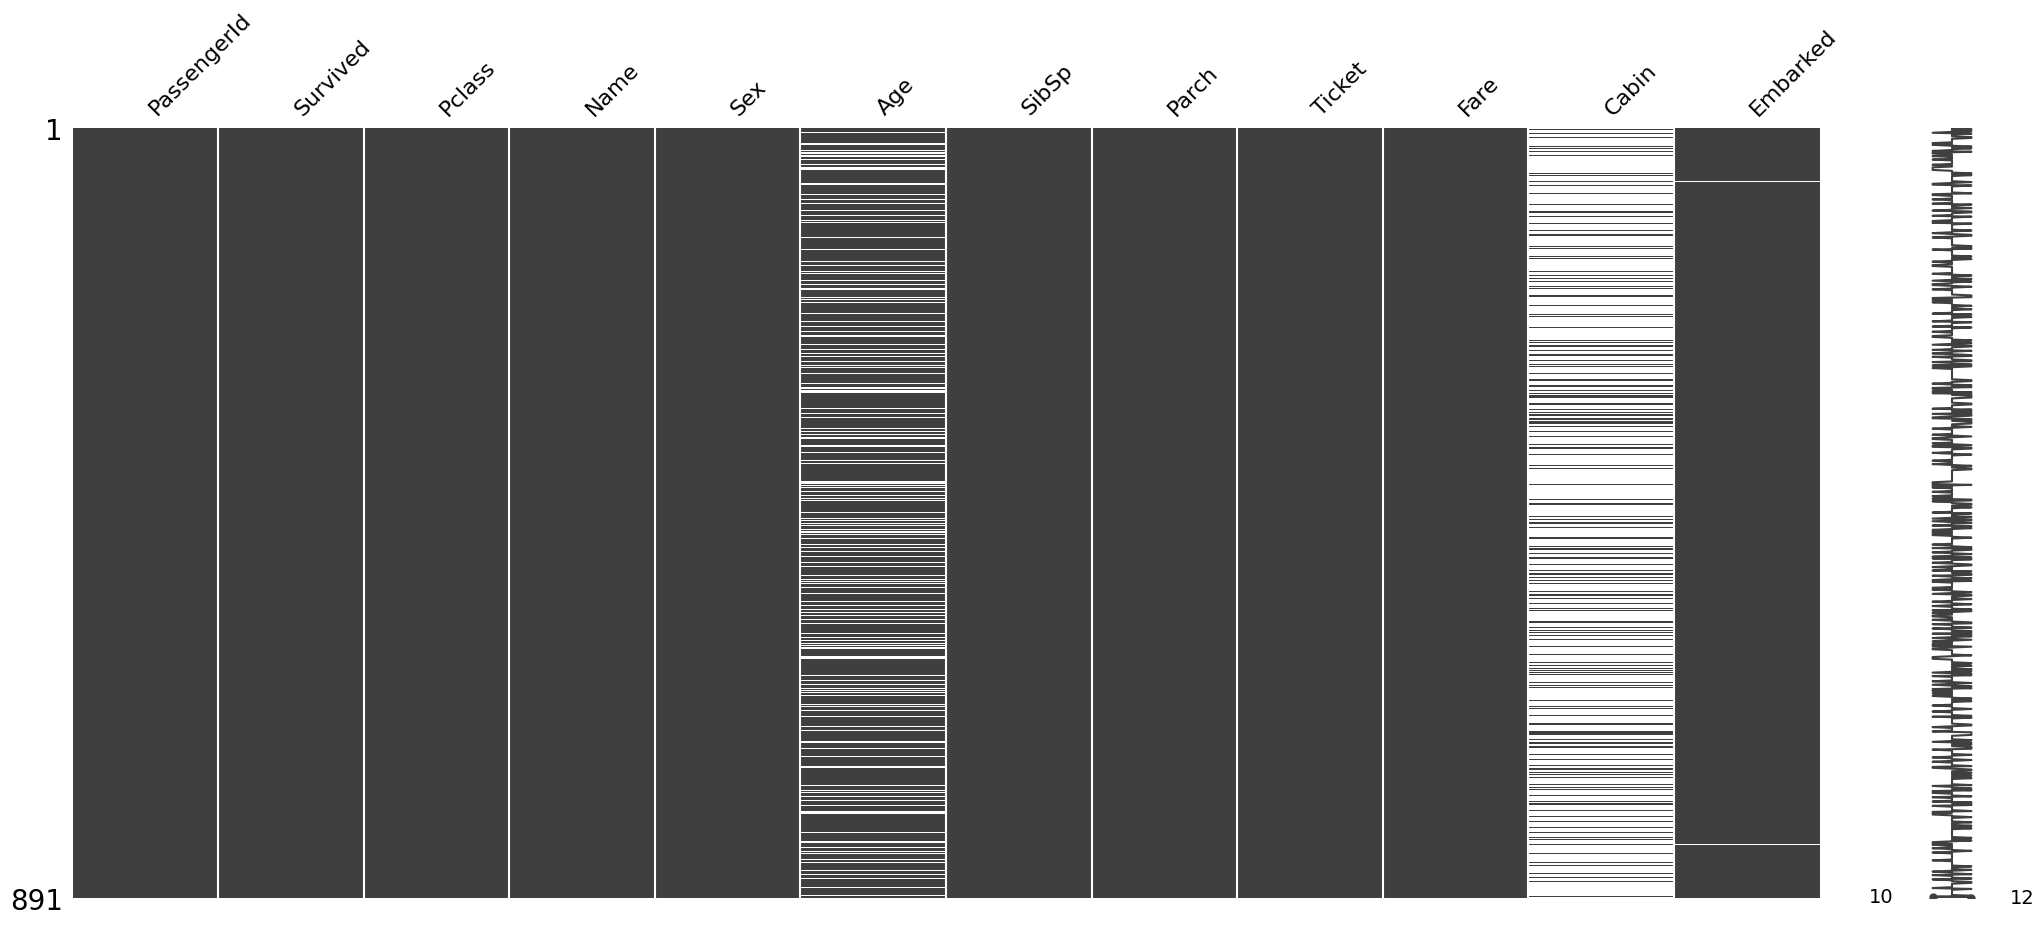

In [13]:
#train
na_train = train.isnull().sum() # Count the number of missing values in each column
print(f"Missing Values Summary for train: \n{na_train}\n")

p1=msno.matrix(train) # Show a matrix of missing values

Missing Values Summary for test: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


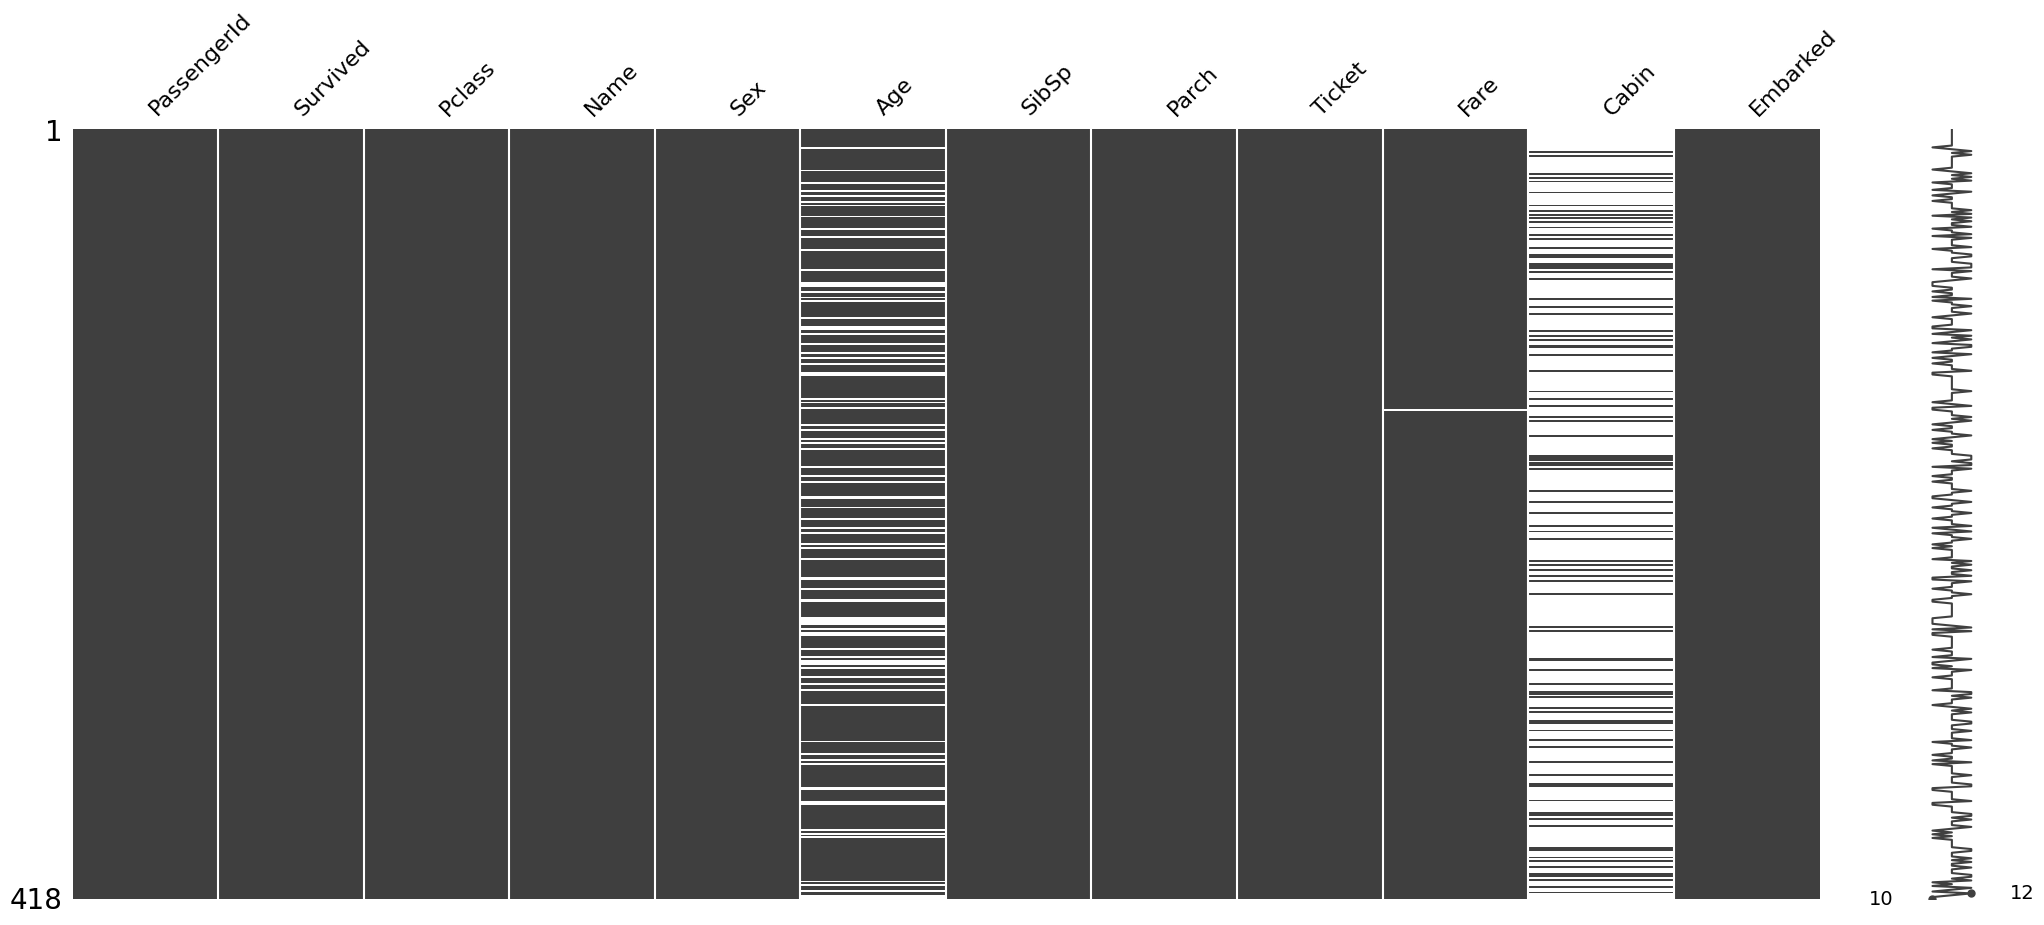

In [14]:
#test
na_test= test.isnull().sum() 
print(f"Missing Values Summary for test: \n{na_test}")

p2=msno.matrix(test)

In [15]:
df.duplicated().sum() #show the number of duplicated rows

0

There are no duplicated rows

In [16]:
df.nunique() # Count the number of unique values in each column

PassengerId    1309
Survived          2
Pclass            3
Name           1307
Sex               2
Age              98
SibSp             7
Parch             8
Ticket          929
Fare            281
Cabin           186
Embarked          3
dtype: int64

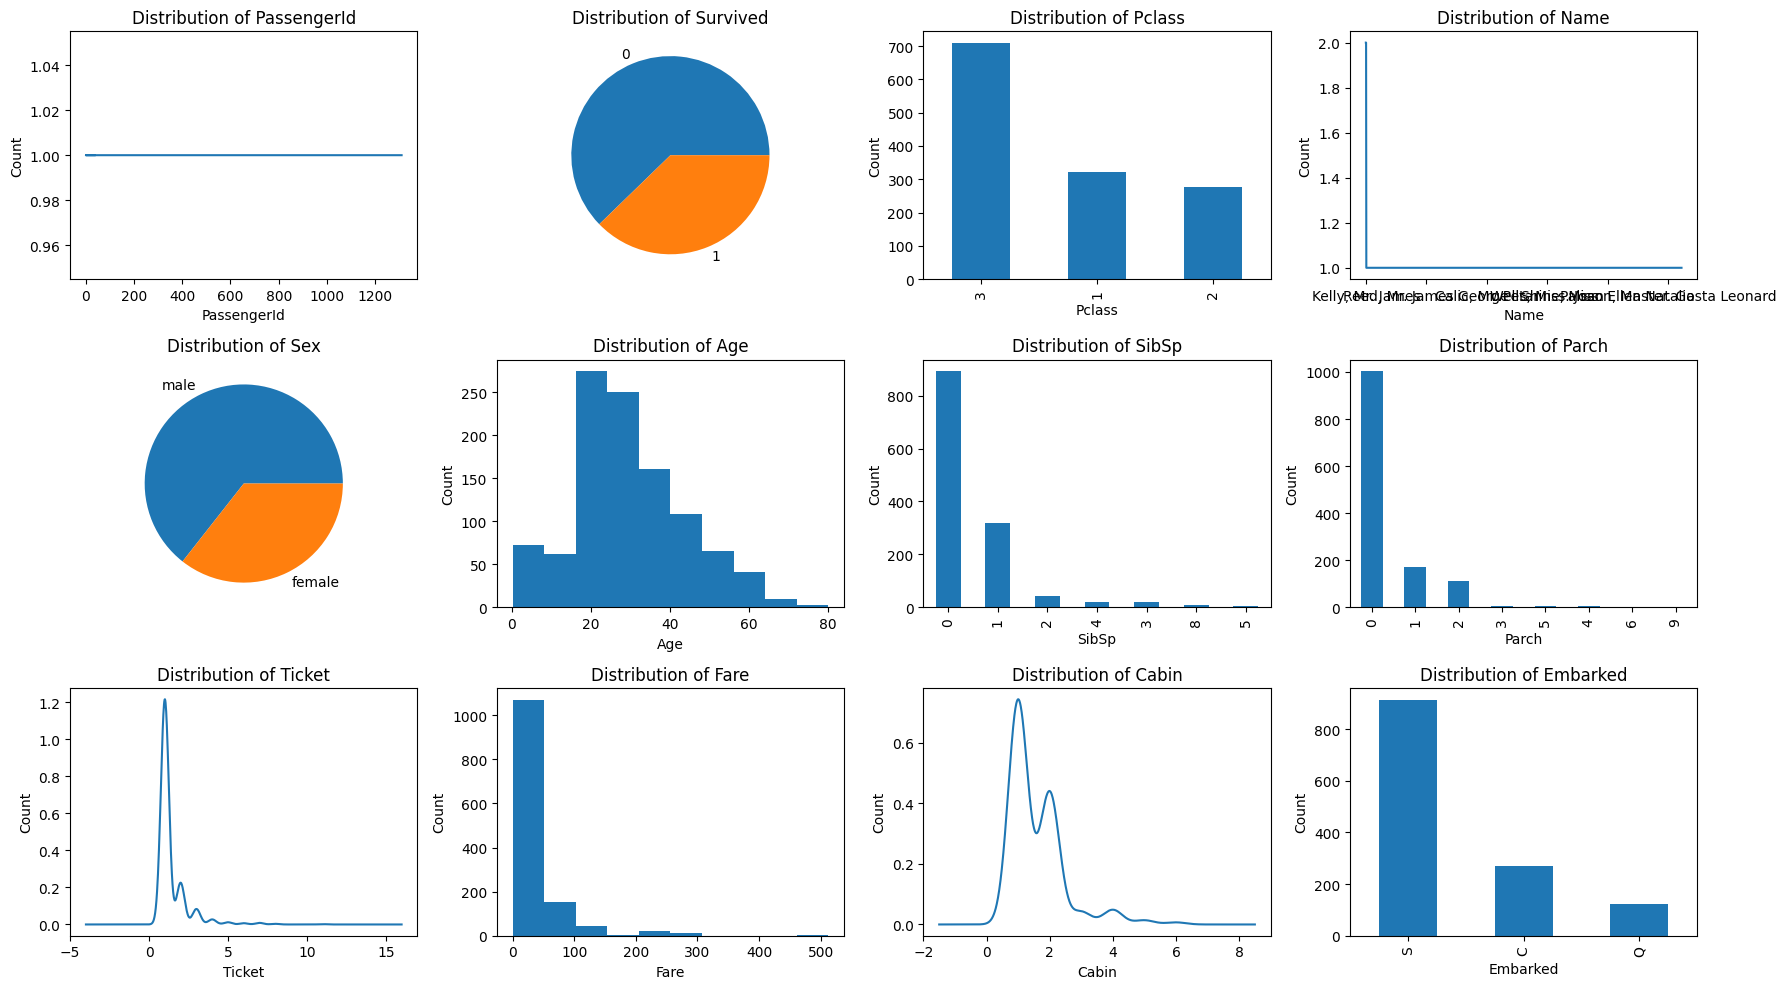

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(18, 10)) # Create a new figure with 3 rows and 6 columns
#PassengerId
df["PassengerId"].value_counts().plot(kind="line", ax=axes[0, 0]) # Plot a line chart
axes[0, 0].set_xlabel("PassengerId") # Set the x-axis label
axes[0, 0].set_ylabel("Count") # Set the y-axis label
axes[0, 0].set_title("Distribution of PassengerId") # Set the title 

# Survived
df["Survived"].value_counts().plot(kind="pie", ax=axes[0, 1])
axes[0, 1].set_ylabel("")
axes[0, 1].set_title("Distribution of Survived")

# Pclass
df["Pclass"].value_counts().plot(kind="bar", ax=axes[0, 2])
axes[0, 2].set_xlabel("Pclass")
axes[0, 2].set_ylabel("Count")
axes[0, 2].set_title("Distribution of Pclass")

# Name
df["Name"].value_counts().plot(kind="line", ax=axes[0, 3])
axes[0, 3].set_xlabel("Name")
axes[0, 3].set_ylabel("Count")
axes[0, 3].set_title("Distribution of Name")

# Sex
df["Sex"].value_counts().plot(kind="pie", ax=axes[1, 0])
axes[1, 0].set_ylabel("")
axes[1, 0].set_title("Distribution of Sex")

# Age
df["Age"].plot(kind="hist", ax=axes[1, 1])
axes[1, 1].set_xlabel("Age")
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_title("Distribution of Age")

# SibSp
df["SibSp"].value_counts().plot(kind="bar", ax=axes[1, 2])
axes[1, 2].set_xlabel("SibSp")
axes[1, 2].set_ylabel("Count")
axes[1, 2].set_title("Distribution of SibSp")

# Parch
df["Parch"].value_counts().plot(kind="bar", ax=axes[1, 3])
axes[1, 3].set_xlabel("Parch")
axes[1, 3].set_ylabel("Count")
axes[1, 3].set_title("Distribution of Parch")

# Ticket
df["Ticket"].value_counts().plot(kind="kde", ax=axes[2, 0])
axes[2, 0].set_xlabel("Ticket")
axes[2, 0].set_ylabel("Count")
axes[2, 0].set_title("Distribution of Ticket")

# Fare
df["Fare"].plot(kind="hist", ax=axes[2, 1])
axes[2, 1].set_xlabel("Fare")
axes[2, 1].set_ylabel("Count")
axes[2, 1].set_title("Distribution of Fare")

# Cabin
df["Cabin"].value_counts().plot(kind="kde", ax=axes[2, 2])
axes[2, 2].set_xlabel("Cabin")
axes[2, 2].set_ylabel("Count")
axes[2, 2].set_title("Distribution of Cabin")

# Embarked
df["Embarked"].value_counts().plot(kind="bar", ax=axes[2, 3])
axes[2, 3].set_xlabel("Embarked")
axes[2, 3].set_ylabel("Count")
axes[2, 3].set_title("Distribution of Embarked")

# Adjust layout
plt.tight_layout()
plt.show()



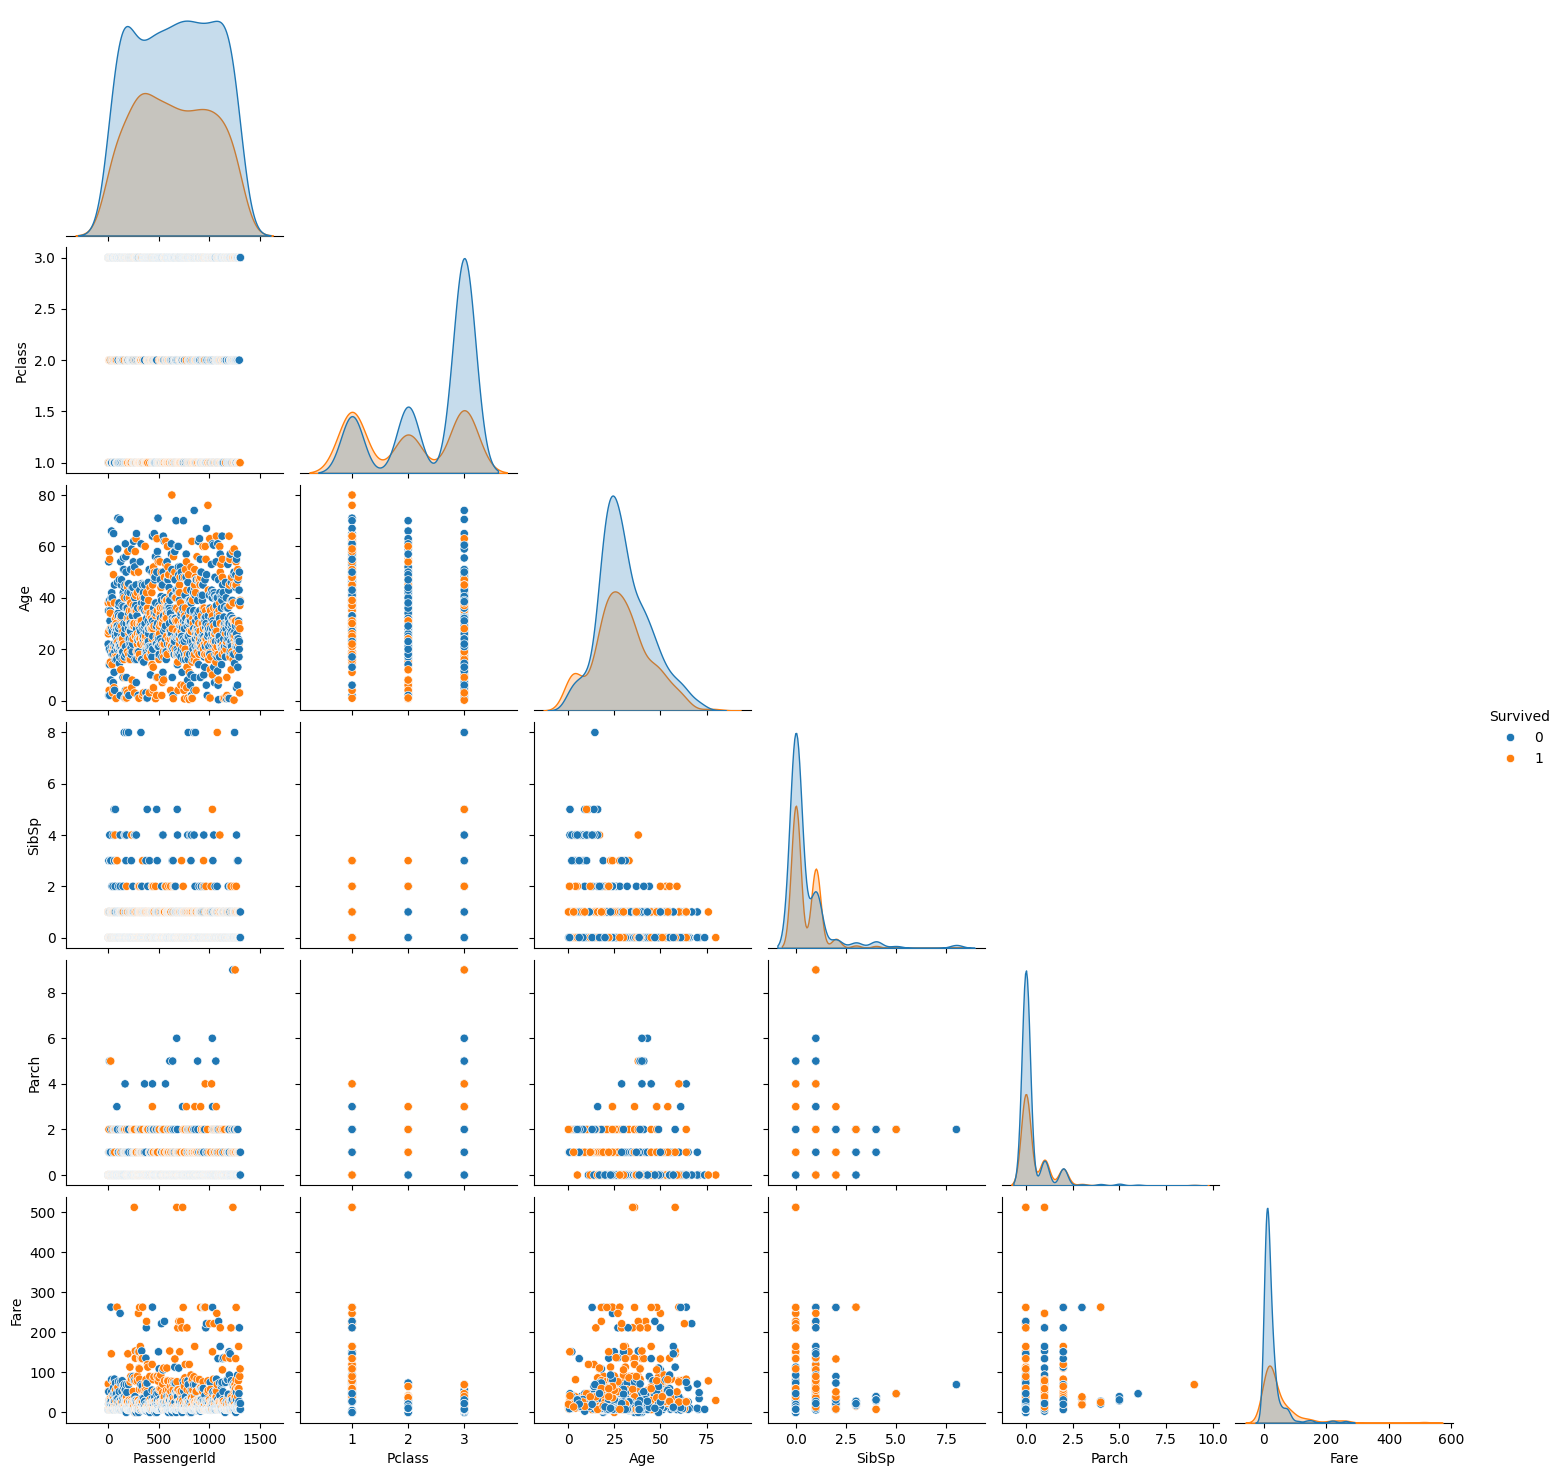

In [18]:
sns.pairplot(df, hue="Survived", corner=True)

<Axes: >

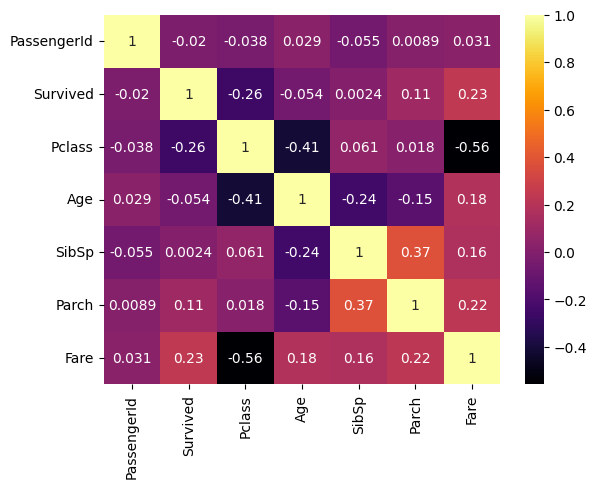

In [19]:
sns.heatmap(df.corr(numeric_only=True), cmap="inferno", annot=True)

It appears that there is a (respectively negative and positive) correlation between Pclass and Fare, and Parch and SibSp

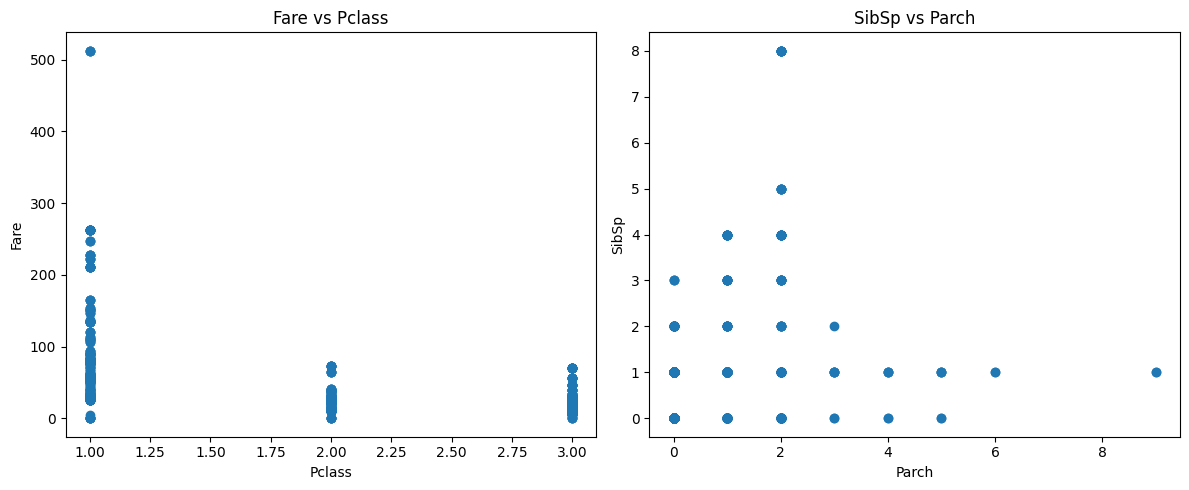

In [20]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

#Fare vs Pclass
axs[0].scatter(df["Pclass"], df["Fare"])
axs[0].set_title("Fare vs Pclass")
axs[0].set_xlabel("Pclass")
axs[0].set_ylabel("Fare")

#SibSp vs Parch
axs[1].scatter(df["Parch"], df["SibSp"])
axs[1].set_title("SibSp vs Parch")
axs[1].set_xlabel("Parch")
axs[1].set_ylabel("SibSp")

plt.tight_layout()
plt.show()

These two graphs don't tell us much, but we know that tickets in higher classes will be sold at higher prices

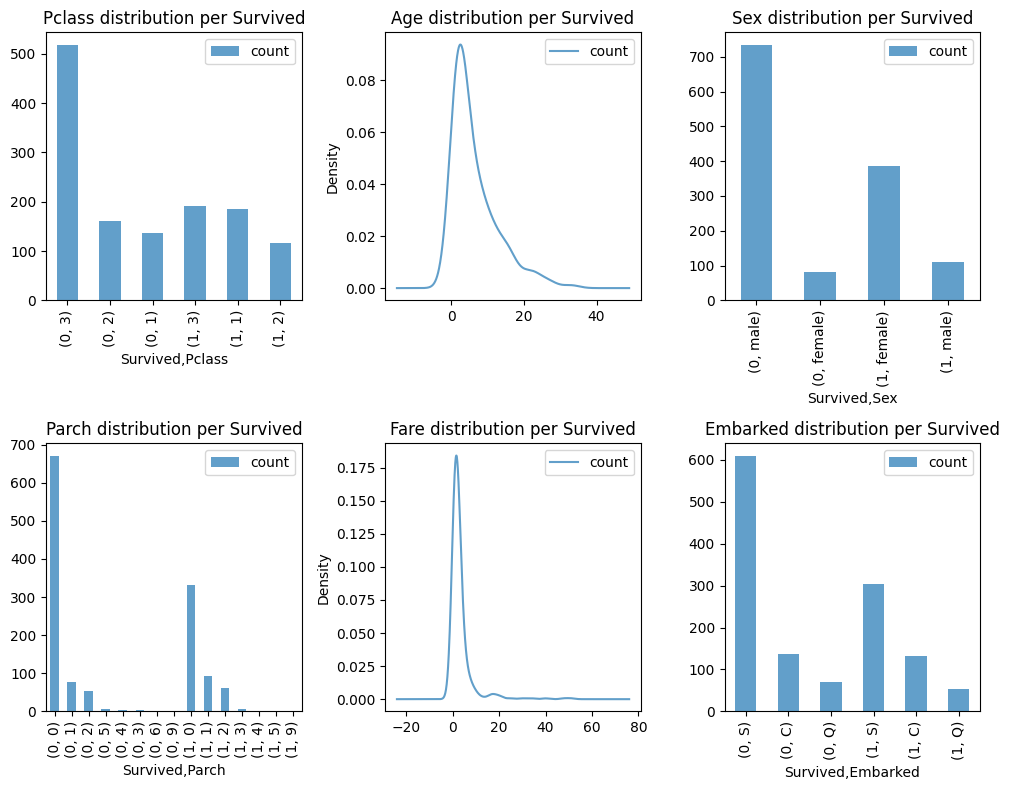

In [21]:
# count plots depending on survived
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

df.groupby("Survived")["Pclass"].value_counts().plot(kind="bar", alpha=0.7, legend=True,figsize=(10, 8), ax=axes[0, 0], title="Pclass distribution per Survived")
df.groupby("Survived")["Age"].value_counts().plot(kind="density", alpha=0.7, legend=True,figsize=(10, 8), ax=axes[0, 1], title="Age distribution per Survived")
df.groupby("Survived")["Sex"].value_counts().plot(kind="bar", alpha=0.7, legend=True,figsize=(10, 8), ax=axes[0, 2], title="Sex distribution per Survived")
df.groupby("Survived")["Parch"].value_counts().plot(kind="bar", alpha=0.7, legend=True,figsize=(10, 8), ax=axes[1, 0], title="Parch distribution per Survived")
df.groupby("Survived")["Fare"].value_counts().plot(kind="density", alpha=0.7, legend=True,figsize=(10, 8), ax=axes[1, 1], title="Fare distribution per Survived")
df.groupby("Survived")["Embarked"].value_counts().plot(kind="bar", alpha=0.7, legend=True,figsize=(10, 8), ax=axes[1, 2], title="Embarked distribution per Survived")

plt.tight_layout()
plt.show()

In these six graphs, it is possible to observe the following:  
  
- The percentage of people who were accommodated in third class and did not survive is higher compared to those who survived.
- Passengers of young age survived in greater numbers compared to other passengers.
- The percentage of men who managed to survive is lower compared to that of women.
- Those who did not have parents and/or children on board and did not survive are in greater numbers compared to those who did.
- Those who paid a lower fare survived in greater numbers.
- The port of embarkation does not seem to influence the possibility of survival.

### Missing Values addressing  
  
Handling missing values in the 'Age' variable opting for either the mean or median to impute these missing values would substantially impact the dataset, altering around 20% of the observations and consequently skewing the overall analysis.  
  
Around 77,5% of the values are missing in the 'Cabin' variable, so it would be preferable to drop this variable.  
    
Fare has 1 missing value, so it is imputed with the mean.  
    
Embarked has 2 missing values, but it is a categorical variable, so it is imputed with the mode since there is a "dominant" embarking site


In [22]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [23]:
#Age
train["Age"].fillna(np.random.randint(df["Age"].min(), df["Age"].max()), inplace=True)
test["Age"].fillna(np.random.randint(df["Age"].min(), df["Age"].max()), inplace=True)

print(train["Age"].isnull().sum()) # to check if the column was filled
print(test["Age"].isnull().sum())


0
0


In [24]:
#Cabin
train.drop(["Cabin"], axis = 1, inplace = True)
test.drop(["Cabin"], axis = 1, inplace = True)

train.head() #to check if the column was dropped

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [25]:
#Fare
print(test[test["Fare"].isna()].index[0]) #check the location of the missing value
print(test.iloc[test[test["Fare"].isna()].index[0]]) #print the row

test["Fare"].fillna(df["Fare"].mean(), inplace=True) #the missing value is only in the test set

print(test.iloc[152]) #check if the missing value was filled in the row


152
PassengerId                  1044
Survived                        0
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Embarked                        S
Name: 152, dtype: object
PassengerId                  1044
Survived                        0
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                    33.295479
Embarked                        S
Name: 152, dtype: object


In [26]:
#Embarked
print(df["Embarked"].mode()) #check the mode
print(train["Embarked"].nunique()) #check the number of unique values

train["Embarked"].fillna("S", inplace=True) # "S" is the mode

print(train["Embarked"].isnull().sum()) #check if the column was filled
print(train["Embarked"].nunique()) #check if the number of unique values is the same as before


0    S
Name: Embarked, dtype: object
3
0
3


### Unuseful variables removal

We remove columns "PassengerId", "Name" and "Ticket" since they don't add any value to the analysis.

In [27]:
train.drop(["PassengerId"], axis = 1, inplace = True)
test.drop(["PassengerId"], axis = 1, inplace = True)

train.drop(["Name"], axis = 1, inplace = True)
test.drop(["Name"], axis = 1, inplace = True)

train.drop(["Ticket"], axis = 1, inplace = True)
test.drop(["Ticket"], axis = 1, inplace = True)

train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Categorical variables transformation


Ordinal Encoding

In [28]:
train["Pclass"]=train["Pclass"].astype("object") #transform the data type
test["Pclass"]=test["Pclass"].astype("object")

encoder=OrdinalEncoder(categories=[sorted(train["Pclass"].unique().tolist(), reverse=True)])

train["Pclass"] = encoder.fit_transform(train["Pclass"].values.reshape(-1, 1)) #we assume that 1st class is better than 2nd, which is better than 3rd
test["Pclass"] = encoder.fit_transform(test["Pclass"].values.reshape(-1, 1))

train.tail() # check if the column was transformed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,1.0,male,27.0,0,0,13.00,S
887,1,2.0,female,19.0,0,0,30.00,S
888,0,0.0,female,61.0,1,2,23.45,S
889,1,2.0,male,26.0,0,0,30.00,C
890,0,0.0,male,32.0,0,0,7.75,Q


One Hot Encoding

In [98]:
train["Sex"]=OneHotEncoder().fit_transform(train["Sex"].values.reshape(-1, 1)).toarray()
test["Sex"]=OneHotEncoder().fit_transform(test["Sex"].values.reshape(-1, 1)).toarray()

train = pd.concat([train, pd.get_dummies(train["Embarked"], prefix="Embarked")], axis=1)
test = pd.concat([test, pd.get_dummies(test["Embarked"], prefix="Embarked")], axis=1)

train.replace({"Embarked_C":{True:1, False:0}, "Embarked_Q":{True:1, False:0}, "Embarked_S":{True:1, False:0}}, inplace=True)
test.replace({"Embarked_C":{True:1, False:0}, "Embarked_Q":{True:1, False:0}, "Embarked_S":{True:1, False:0}}, inplace=True)

train.drop(["Embarked"], axis = 1, inplace = True)
test.drop(["Embarked"], axis = 1, inplace = True)

train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
886,0,1.0,0.0,27.0,0,0,13.00,0,0,1
887,1,2.0,1.0,19.0,0,0,30.00,0,0,1
888,0,0.0,1.0,68.0,1,2,23.45,0,0,1
889,1,2.0,0.0,26.0,0,0,30.00,1,0,0
890,0,0.0,0.0,32.0,0,0,7.75,0,1,0


In [29]:
# Alternative way to encode the data
# In this way, we create a sparse matrix to encode each variable. Harder to handle
 
train["Sex"]=OneHotEncoder().fit_transform(train["Sex"].values.reshape(-1, 1)).toarray()
test["Sex"]=OneHotEncoder().fit_transform(test["Sex"].values.reshape(-1, 1)).toarray()

train[["Embarked"]]=OneHotEncoder().fit_transform(train[["Embarked"]])
test[["Embarked"]]=OneHotEncoder().fit_transform(test[["Embarked"]])

train.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,1.0,0.0,27.0,0,0,13.00,"(0, 2)\t1.0"
887,1,2.0,1.0,19.0,0,0,30.00,"(0, 2)\t1.0"
888,0,0.0,1.0,61.0,1,2,23.45,"(0, 2)\t1.0"
889,1,2.0,0.0,26.0,0,0,30.00,"(0, 0)\t1.0"
890,0,0.0,0.0,32.0,0,0,7.75,"(0, 1)\t1.0"


## Model
We choose to use Linear regression 

In [30]:
X_train = train.drop("Survived", axis=1) # Definition of input variables for training set
y_train = train["Survived"] # Definition of output variable for training set

X_test = test.drop("Survived", axis=1)# Definition of input variables for test set
y_test = test["Survived"] # Definition of output variable for test set

In [31]:
X_train.shape,X_test.shape # Check the shape

((891, 7), (418, 7))

68,5% train set and 31,5% test set may not be optimal, but it is neither an issue

### Logistic Regression
Model training

In [ ]:
classifier = LogisticRegression(random_state=42, max_iter=10000) #Istantiate our logistic regression classifier
classifier.fit(X_train, y_train) #Fit our logistic regression classifier

In [ ]:
y_pred = classifier.predict(X_test) #Predict the test data

Model evaluation

Accuracy: 0.9234449760765551 


Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94       266
           1       0.85      0.95      0.90       152

    accuracy                           0.92       418
   macro avg       0.91      0.93      0.92       418
weighted avg       0.93      0.92      0.92       418


Matthew's Correlation Coefficient: 0.8421545071298379
Confusion Matrix:


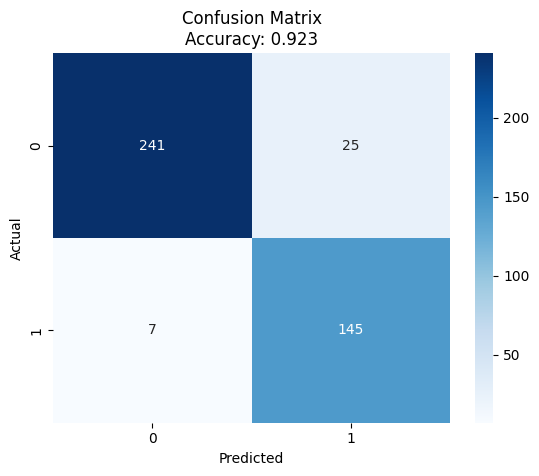

In [ ]:
accuracy = accuracy_score(y_test, y_pred) #Accuracy
print(f'Accuracy: {accuracy} \n')

report = classification_report(y_test, y_pred) #Precision, recall and F1-score
print(f'\nClassification Report:\n {report}')

mcc = matthews_corrcoef(y_test, y_pred)
print(f"\nMatthew's Correlation Coefficient: {mcc}") #Matthew's Correlation Coefficient

conf_matrix = confusion_matrix(y_test, y_pred) #Confusion Matrix
print("Confusion Matrix:")
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues') #Plot the confusion matrix
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.3f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Hyperparameter tuning

In [ ]:
param_grid = {
    "C": [0.1, 1], # C: regularization parameter
    "solver": ['liblinear', 'lbfgs', 'newton-cg', 'sag'], # solver: algorithm to use in the optimization problem (for logistic regression)
    "max_iter": [10000, 15000, 20000],# max_iter: maximum number of iterations taken for the solver to converge
}

In [ ]:
model = LogisticRegression(random_state=42, max_iter=10000) #Istantiate our logistic regression classifier
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='accuracy', n_jobs=-1, refit=True, verbose=3)  # define the grid search
model_grid = grid.fit(X_train, y_train)  # actually executing the grid search

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 2/2] END C=0.1, max_iter=10000, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/2] END C=0.1, max_iter=10000, solver=liblinear;, score=0.760 total time=   0.0s
[CV 1/2] END C=0.1, max_iter=10000, solver=newton-cg;, score=0.767 total time=   0.0s
[CV 2/2] END C=0.1, max_iter=10000, solver=newton-cg;, score=0.798 total time=   0.0s
[CV 1/2] END C=0.1, max_iter=10000, solver=lbfgs;, score=0.767 total time=   0.1s
[CV 2/2] END C=0.1, max_iter=10000, solver=lbfgs;, score=0.798 total time=   0.1s
[CV 1/2] END C=0.1, max_iter=15000, solver=liblinear;, score=0.760 total time=   0.0s
[CV 2/2] END C=0.1, max_iter=15000, solver=liblinear;, score=0.796 total time=   0.0s
[CV 1/2] END C=0.1, max_iter=15000, solver=newton-cg;, score=0.767 total time=   0.0s
[CV 2/2] END C=0.1, max_iter=15000, solver=newton-cg;, score=0.798 total time=   0.0s
[CV 2/2] END C=0.1, max_iter=20000, solver=liblinear;, score=0.796 total time=   0.0s
[

In [ ]:
model = model_grid.best_estimator_  # retrieve the best-performing model found during the grid search
y_pred = model.predict(X_test)  # make predictions on the test data

Accuracy: 90.670%

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       266
           1       0.82      0.95      0.88       152

    accuracy                           0.91       418
   macro avg       0.90      0.92      0.90       418
weighted avg       0.92      0.91      0.91       418


Matthew's Correlation Coefficient: 0.8116138502509033
Confusion Matrix:


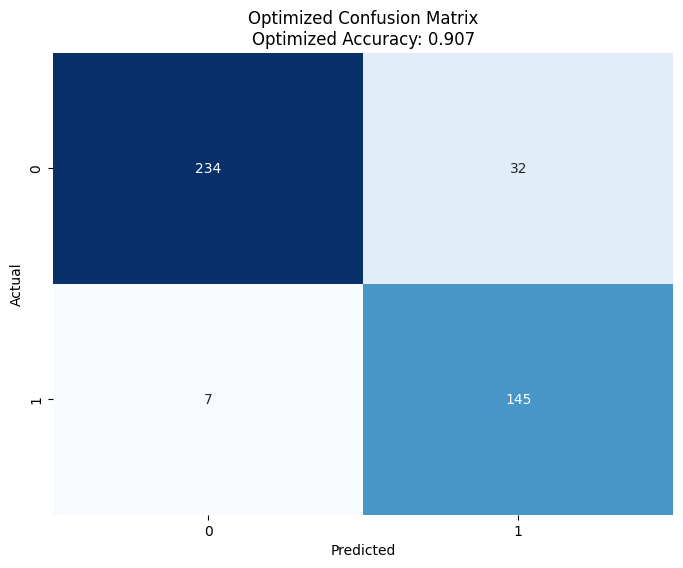

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.3%}".format(accuracy))

class_report = classification_report(y_test, y_pred)
print(f"\nClassification Report:\n {class_report}")

mcc = matthews_corrcoef(y_test, y_pred)
print(f"\nMatthew's Correlation Coefficient: {mcc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f'Optimized Confusion Matrix\nOptimized Accuracy: {accuracy:.3f}')
plt.show()

The initial results and those after hyperparameter optimization demonstrate a significant decrease in the model evaluation metrics values. The confusion matrix, accuracy, and precision, recall, and F1-score metrics have all decreased. Despite hyperparameter optimization, the model appears to maintain a good overall performance, suggesting that the initial configuration may already be close to optimal for the given dataset. Further analysis may be required to determine if there are other avenues for improvement.